# "Pandas"

- toc: false 
- comments: false
- layout: post

# Pandas

In this tutorial we will see some information about the **Python Data Analysis** library.

First, here are some libraries that we may want to use at various points in our examples.

<a href = http://numpy.org>Numpy</a> is one of the most important libraries, as it enables us to manipulate data in the form of multidimensional arrays.
It also gives us some operations such as random number generation

The <a href = http://matplotlib.org>matplotlib</a> library enables plotting using an interface similar to MATLAB.

In [38]:
#this command is useful for making the plots appear inside the notebook
%matplotlib inline 

import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from datetime import datetime

##Data Structures

Pandas have different data structures that we can use for manipulating different types of data. Here we will see **Series** (1-dimensional data structures) and **Data Frames** (2-dimensional data structures).

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

*s = pd.Series(data, index=index)*

Here, data can be many different things:
- a Python dict
- an <a href = http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html> ndarray </a>
- a scalar value (like 5)

The passed index is a list of axis labels. 

In [4]:
#Series from list with index (row names)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
#s = pd.Series([1,2,3,4,5],index=['a', 'b', 'c', 'a', 'e'] )
s

a   -0.246915
b    0.942119
c    0.022019
d    0.283412
e   -0.495210
dtype: float64

In [5]:
#Series from list without index. Default index = [1,2,...]
pd.Series(np.random.randn(5)) 

0    3.159664
1   -0.792537
2    0.346478
3    0.647315
4    0.244372
dtype: float64

In [6]:
#Series from dictionary: The keys are used as index, and the values as series values 
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
#Series with missing data
pd.Series(d, index=['b', 'c', 'd', 'a'])
#note that by setting the index we can re-arrange the series values

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

**Note**: NaN (not a number) is the standard missing data marker used in pandas

In [8]:
#Series with a scalar
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

We can select parts of the series, and perform operations on series

In [9]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1.108348
b   -0.266645
c   -1.318730
d    0.818145
e    0.873283
dtype: float64


In [10]:
#Selection from series
print(s[0])
print (s['a'])
print (s[:2])
print(s[3:5])
print(s.median())
print(s>s.median())
print(s[s>s.median()])

#Operations on Series
#print (s+s)
#print (2*s)
#print (s**2)

1.10834848742
1.10834848742
a    1.108348
b   -0.266645
dtype: float64
d    0.818145
e    0.873283
dtype: float64
0.8181453924284302
a     True
b    False
c    False
d    False
e     True
dtype: bool
a    1.108348
e    0.873283
dtype: float64


In [11]:
#Using s[predicate] we can select different entries in the data series
print(s[s>0])

a    1.108348
d    0.818145
e    0.873283
dtype: float64


###Data Frames
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dictionary of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

In [12]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
print(df)

In [13]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]} 
#     'two' : [4., 3., 2., 1.,7.]} 

pd.DataFrame(d)
pd.DataFrame(d, index = ['a','b','c','d'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [14]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])],
                       orient='index', columns=['one', 'two', 'three']
                        )
#The orient = 'index' makes the keys to be rows, otherwise they would be columns

,one,two,three
A,1,2,3
B,4,5,6


In [15]:
df2 = pd.DataFrame({ 'A' : 1.,
                   #'B' : pd.Timestamp('20130102'),
                   'B': pd.date_range('20151101', periods=4),
                   'C' : np.random.randn(4),
                   'D' : pd.Categorical(["test","train","test","train"]),
                   'E' : ["foo","bar","foo","bar"] }
                   ,index = ['first','second','third','fourth']
                  )
df2
#df2.info()

,A,B,C,D,E
first,1.0,2015-11-01,0.499404,test,foo
second,1.0,2015-11-02,-0.993633,train,bar
third,1.0,2015-11-03,-1.145973,test,foo
fourth,1.0,2015-11-04,-0.436992,train,bar


In [16]:
tdf = pd.DataFrame([['a',1],['a',1],['b',2],['c',3],['c',2],['a',1]])
tdf

,0,1
0,a,1
1,a,1
2,b,2
3,c,3
4,c,2
5,a,1


Loading data frame from CSV file

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DataScientist-fr/datasets/main/distributions_short.csv',
                 names=list('ABCD'))
df

,A,B,C,D
0,43.824904,0.000521,6.417850e-14,0.022664
1,20.476820,0.002384,6.852720e-07,0.047537
2,50.858518,0.000387,4.898470e-16,0.019378
3,33.428671,0.000895,8.649030e-11,0.029216
4,34.905758,0.000820,3.106850e-11,0.027941
5,56.353824,0.000315,1.085950e-17,0.017495
6,18.421861,0.002943,2.847520e-06,0.053069
7,94.764520,0.000111,2.971920e-29,0.010524
8,50.440349,0.000393,6.545490e-16,0.019569
9,81.208300,0.000152,3.579860e-25,0.012295


**Loading data from the web**

More information on what types of data you can fetch
http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [18]:
stocks = 'YELP'

ydf = web.get_data_yahoo(stocks)
#                                 start=datetime.datetime(2011, 10, 1), 
#                                 end=datetime.datetime(2014, 12, 31))


ydf.info()
ydf.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1266 entries, 2012-03-02 to 2017-03-14
Data columns (total 6 columns):
Open         1266 non-null float64
High         1266 non-null float64
Low          1266 non-null float64
Close        1266 non-null float64
Volume       1266 non-null int64
Adj Close    1266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 69.2 KB


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-02,22.010000,26.000000,22.000000,24.58,4809400,24.58
2012-03-05,24.850000,24.860001,20.900000,20.99,2988200,20.99
2012-03-06,19.830000,20.500000,19.360001,20.50,1154300,20.50
2012-03-07,20.450001,20.629999,19.950001,20.25,444800,20.25
2012-03-08,20.299999,20.389999,19.959999,20.00,436900,20.00


Changing column names

In [19]:
new_column_names = [x.lower().replace(' ','_') for x in ydf.columns]
ydf.columns = new_column_names
ydf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1266 entries, 2012-03-02 to 2017-03-14
Data columns (total 6 columns):
open         1266 non-null float64
high         1266 non-null float64
low          1266 non-null float64
close        1266 non-null float64
volume       1266 non-null int64
adj_close    1266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 69.2 KB


**Saving data**

Save a df into a csv:

In [ ]:
df.to_csv('foo.csv')

##Operations with pandas

**Indexing**

The basics of indexing are as follows:

<table>
<tr>
<td> Operation</td>	<td>Syntax</td>	<td>Result</td>
</tr>

<tr>
<td> Select column</td>	<td>df[col] (df.col)</td>	<td>Series</td>
</tr>
<tr>
<td> Select columns</td>	<td>df[[col list]]</td>	<td>Data Frame</td>
</tr>
<tr>
<td> Select row by label</td>	<td>df.loc[label]</td>	<td>Series</td>
</tr>
<tr>
<td> Select row by integer location</td>	<td>df.iloc[loc]</td>	<td>Series</td>
</tr>
<tr>
<td> Slice rows</td>	<td>df[5:10]</td>	<td>Data Frame</td>
</tr>
</table>

In [20]:
df2['B']
df2.A
df2.loc['first'] 
df2.ix('first')
df2.iloc[1:3]
df2.iloc[1]
df2[['A','B']]
df2[['A','B']][1:3]
df2[1:3][['A','B']]

,A,B
second,1.0,2015-11-02
third,1.0,2015-11-03


**Accessing the data**

In [ ]:
df.columns #the names of the columns
df.values # all values without index and column names in numpy array
df2.info() # info about the data per column
df.head() # top lines
df.tail() # bottom lines

Iterating over rows

In [ ]:
num_positive_days = 0
for idx, row in ydf.iterrows():
    if row.close > row.open:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))

**Filtering rows**

We can select a subset of interesting rows using a boolean predicate. This will also return a data frame

In [ ]:
df2.query('C>0')
df2[df2.C>0]
df[df>0.2]
df[df>0.2].A
df.A[df.D > .002]

In [ ]:
tmp_high = ydf.high > 55
tmp_high.head()
#ydf[tmp_high]

In [ ]:
positive_days = ydf[ydf.close > ydf.open]
positive_days.head()
very_positive_days = ydf[ydf.close-ydf.open > 4]
very_positive_days.head()

**Transforming the data**

In [21]:
#Transposing data
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,4.382490e+01,2.047682e+01,5.085852e+01,3.342867e+01,3.490576e+01,5.635382e+01,18.421861,9.476452e+01,5.044035e+01,8.120830e+01,4.253465e+01,8.633082e+01,3.547390e+01,4.771897e+01,9.212555e+01,5.246668e+01,2.863522e+01,6.731236e+01,5.957083e+01,7.229879
B,5.205410e-04,2.384295e-03,3.865770e-04,8.946440e-04,8.202790e-04,3.148610e-04,0.002943,1.113500e-04,3.929380e-04,1.516340e-04,5.525930e-04,1.341620e-04,7.944620e-04,4.390430e-04,1.178160e-04,3.631850e-04,1.218152e-03,2.206770e-04,2.817430e-04,0.018892
C,6.417850e-14,6.852720e-07,4.898470e-16,8.649030e-11,3.106850e-11,1.085950e-17,0.000003,2.971920e-29,6.545490e-16,3.579860e-25,1.569630e-13,1.027620e-26,2.095510e-11,4.316770e-15,1.851170e-28,1.606780e-16,2.398510e-09,5.457060e-21,1.167870e-18,0.006660
D,2.266408e-02,4.753674e-02,1.937783e-02,2.921596e-02,2.794150e-02,1.749503e-02,0.053069,1.052388e-02,1.956864e-02,1.229485e-02,2.350948e-02,1.145319e-02,2.807506e-02,2.062644e-02,1.079042e-02,1.879208e-02,3.411195e-02,1.476143e-02,1.672548e-02,0.125950


In [22]:
#Pivoting data: 
df3 = pd.DataFrame({ 'A' : 1.,
                   #'B' : pd.Timestamp('20130102'),
                   'B': pd.date_range('20151101', periods=4),
                   'C' : np.random.randn(4),
                   'D' : pd.Categorical(["test","train","test","train"]),
                   'E' : ["foo","bar","foo","bar"] }
                   ,index = ['first','second','third','fourth']
                  )
pd.pivot_table(df3, index=['B'],  columns=['D'], values='C')
#the column values in B to become the rows, 
#the values in D to become columns, 
#the values in C become the cell values
#if there are more than one values, they are are aggregated by taking the mean.

D,test,train
B,,
2015-11-01,-0.994808,NaN
2015-11-02,NaN,0.357315
2015-11-03,1.636283,NaN
2015-11-04,NaN,-1.519842


In [23]:
#Apply a function
df.apply(lambda x: 2*x)
#df.a.apply(lambda x: x+1)

,A,B,C,D
0,87.649808,0.001041,1.283570e-13,0.045328
1,40.953640,0.004769,1.370544e-06,0.095073
2,101.717037,0.000773,9.796940e-16,0.038756
3,66.857343,0.001789,1.729806e-10,0.058432
4,69.811517,0.001641,6.213700e-11,0.055883
5,112.707649,0.000630,2.171900e-17,0.034990
6,36.843721,0.005885,5.695040e-06,0.106137
7,189.529040,0.000223,5.943840e-29,0.021048
8,100.880697,0.000786,1.309098e-15,0.039137
9,162.416600,0.000303,7.159720e-25,0.024590


In [24]:
#Histograms
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
s.value_counts()
np.histogram(df.A,10)

0    5
1    3
2    5
3    3
4    3
5    6
6    2
7    4
8    2
9    4
dtype: int32


(array([1, 2, 2, 2, 5, 3, 1, 0, 1, 3], dtype=int64),
 array([  7.22987917,  15.98334327,  24.73680737,  33.49027147,
         42.24373557,  50.99719967,  59.75066377,  68.50412787,
         77.25759197,  86.01105607,  94.76452017]))

**Creating new columns**

The **assign()** method that allows you to easily create new columns that are potentially derived from existing columns. assign always returns a copy of the data, leaving the original DataFrame untouched

We can also simply create a new column like we would do with a dicitionary. In this case the column stays in the data. The column is deleted again like in a dictionary.

In [25]:
df = pd.DataFrame({'a':pd.Series(np.random.randn(5)), 
                   'b':pd.Series(np.random.randn(5))})
#df['c'] = df['a']/df['b']
#df
#del df['c']
df3 = df.assign(c = df['a']/df['b'])
print(df)
print(df3)
df['c'] = df['a']/df['b']
print(df)
#remove the new column
df.drop('c', axis = 1) #axis = 0 means rows, axis =1 means columns

          a         b
0 -0.129832  1.119837
1 -0.148331  2.698137
2 -0.875598 -0.169666
3 -1.091867 -0.068784
4  0.394760 -0.520545
          a         b          c
0 -0.129832  1.119837  -0.115938
1 -0.148331  2.698137  -0.054975
2 -0.875598 -0.169666   5.160708
3 -1.091867 -0.068784  15.873898
4  0.394760 -0.520545  -0.758358
          a         b          c
0 -0.129832  1.119837  -0.115938
1 -0.148331  2.698137  -0.054975
2 -0.875598 -0.169666   5.160708
3 -1.091867 -0.068784  15.873898
4  0.394760 -0.520545  -0.758358


,a,b
0,-0.129832,1.119837
1,-0.148331,2.698137
2,-0.875598,-0.169666
3,-1.091867,-0.068784
4,0.394760,-0.520545


In [26]:
ydf['profit'] = ydf.close - ydf.open
ydf.head()

,open,high,low,close,volume,adj_close,profit
Date,,,,,,,
2012-03-02,22.010000,26.000000,22.000000,24.58,4809400,24.58,2.570000
2012-03-05,24.850000,24.860001,20.900000,20.99,2988200,20.99,-3.860000
2012-03-06,19.830000,20.500000,19.360001,20.50,1154300,20.50,0.670000
2012-03-07,20.450001,20.629999,19.950001,20.25,444800,20.25,-0.200001
2012-03-08,20.299999,20.389999,19.959999,20.00,436900,20.00,-0.299999


In [ ]:
for idx, row in ydf.iterrows():
    if row.close > row.open:
        ydf.ix[idx,'gain']='negative'
    elif (row.open - row.close) < 1:
        ydf.ix[idx,'gain']='small_gain'
    elif (row.open - row.close) < 6:
        ydf.ix[idx,'gain']='medium_gain'
    else:
        ydf.ix[idx,'gain']='large_gain'
ydf.head()

Define a function that classifies rows, and apply it to each row to create a new row

In [29]:
def label_row(row):
    if row.close > row.open:
        return 'negative'
    elif (row.open - row.close) < 1:
        return 'small_gain'
    elif (row.open - row.close) < 6:
        return 'medium_gain'
    else:
        return 'large_gain'

ydf['test_column'] = ydf.apply(label_row, axis = 1)
print(ydf.head())
ydf = ydf.drop('test_column', axis = 1)

                 open       high        low  close   volume  adj_close  \
Date                                                                     
2012-03-02  22.010000  26.000000  22.000000  24.58  4809400      24.58   
2012-03-05  24.850000  24.860001  20.900000  20.99  2988200      20.99   
2012-03-06  19.830000  20.500000  19.360001  20.50  1154300      20.50   
2012-03-07  20.450001  20.629999  19.950001  20.25   444800      20.25   
2012-03-08  20.299999  20.389999  19.959999  20.00   436900      20.00   

              profit  test_column  
Date                               
2012-03-02  2.570000     negative  
2012-03-05 -3.860000  medium_gain  
2012-03-06  0.670000     negative  
2012-03-07 -0.200001   small_gain  
2012-03-08 -0.299999   small_gain  


**Computing Statitics and other operations**

In [31]:
print(df)
# unless the axis is specified as 1, all operations are on columns
print(df.sum()) 
print(df.mean())
print(df.mean(1)) #df.mean(axis = 1) 
print(df.std())
print(df.var())
print(df.describe())

          a         b          c
0 -0.129832  1.119837  -0.115938
1 -0.148331  2.698137  -0.054975
2 -0.875598 -0.169666   5.160708
3 -1.091867 -0.068784  15.873898
4  0.394760 -0.520545  -0.758358
a    -1.850868
b     3.058978
c    20.105335
dtype: float64
a   -0.370174
b    0.611796
c    4.021067
dtype: float64
0    0.291355
1    0.831610
2    1.371815
3    4.904416
4   -0.294714
dtype: float64
a    0.605887
b    1.319753
c    7.042021
dtype: float64
a     0.367099
b     1.741748
c    49.590054
dtype: float64
              a         b          c
count  5.000000  5.000000   5.000000
mean  -0.370174  0.611796   4.021067
std    0.605887  1.319753   7.042021
min   -1.091867 -0.520545  -0.758358
25%   -0.875598 -0.169666  -0.115938
50%   -0.148331 -0.068784  -0.054975
75%   -0.129832  1.119837   5.160708
max    0.394760  2.698137  15.873898


**Join**

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo', 'boo'], 'lval': [1, 2,3]})
print(left)
right = pd.DataFrame({'key': ['foo', 'hoo'], 'rval': [4, 5]})
print(right)
dfm = pd.merge(left, right, on='key') #keeps only the common key 'foo'
print(dfm)
dfm = pd.merge(left, right, on='key', how='left') #keeps all the keys from the left and puts NaN for missing values
print(dfm)

   key  lval
0  foo     1
1  foo     2
2  boo     3
   key  rval
0  foo     4
1  hoo     5
   key  lval  rval
0  foo     1     4
1  foo     2     4
   key  lval  rval
0  foo     1   4.0
1  foo     2   4.0
2  boo     3   NaN


**Group by**

In [42]:
df3 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
print(df3)
print(df3.groupby('A').sum())
# column B cannot be summed so it is ommitted.
print(df3.groupby('A').min())
print(df3.groupby(['A','B']).sum())

     A      B         C         D
0  foo    one -1.023675  0.655974
1  bar    one -0.545597 -1.268289
2  foo    two -0.464371 -2.105605
3  bar  three -1.072986  0.061263
4  foo    two -0.115774 -0.908701
5  bar    two  0.694054 -1.853005
6  foo    one -0.124638 -1.453145
7  foo  three -1.212742  0.414323
            C         D
A                      
bar -0.924529 -3.060031
foo -2.941200 -3.397153
       B         C         D
A                           
bar  one -1.072986 -1.853005
foo  one -1.212742 -2.105605
                  C         D
A   B                        
bar one   -0.545597 -1.268289
    three -1.072986  0.061263
    two    0.694054 -1.853005
foo one   -1.148313 -0.797171
    three -1.212742  0.414323
    two   -0.580145 -3.014305


In [43]:
g = df3.groupby(['A','B']).sum()
print(type(g))
print(g)
print(g.loc[('bar','one')])

<class 'pandas.core.frame.DataFrame'>
                  C         D
A   B                        
bar one   -0.545597 -1.268289
    three -1.072986  0.061263
    two    0.694054 -1.853005
foo one   -1.148313 -0.797171
    three -1.212742  0.414323
    two   -0.580145 -3.014305
C   -0.545597
D   -1.268289
Name: (bar, one), dtype: float64


Group by produces a DataFrameGroupBy object that for each possible value of the group by attribute produces a dataframe

In [44]:
g = df3.groupby(['A','B'])
type(g)

pandas.core.groupby.DataFrameGroupBy

In [45]:
for vals, data in g:
    print(vals)
    print(data)
    print('--------------')


('bar', 'one')
     A    B         C         D
1  bar  one -0.545597 -1.268289
--------------
('bar', 'three')
     A      B         C         D
3  bar  three -1.072986  0.061263
--------------
('bar', 'two')
     A    B         C         D
5  bar  two  0.694054 -1.853005
--------------
('foo', 'one')
     A    B         C         D
0  foo  one -1.023675  0.655974
6  foo  one -0.124638 -1.453145
--------------
('foo', 'three')
     A      B         C         D
7  foo  three -1.212742  0.414323
--------------
('foo', 'two')
     A    B         C         D
2  foo  two -0.464371 -2.105605
4  foo  two -0.115774 -0.908701
--------------


In [48]:
print(g.loc[('bar','one')])

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [49]:
g = df3.groupby(['A','B'])
bo = g.get_group(('foo','two')) #selects a specific group: returns a data frame
bo[['C','D']]

,C,D
2,-0.464371,-2.105605
4,-0.115774,-0.908701


In [50]:
g = df3[['A','B','C']].groupby(['A','B'])
list(g.get_group(('foo','two')).C)

[-0.46437132788219437, -0.11577357958442364]

####Sorting####

In [51]:
df4 = pd.DataFrame({'A':np.random.randint(1,3,10),
                    'B': np.random.randint(1,5,10),
                    'C': np.random.randn(10)})
df4.sort_values(by='A')
df4.sort_values(by = ['A','B'], ascending = [True,False])
df4[['A','B']].drop_duplicates().sort_values(by = 'A') #drop_duplicates: remove duplicate rows from a data frame

,A,B
0,1,2
1,1,4
2,1,1
6,1,3
3,2,2
5,2,1


In [52]:
l = list(df4.B.unique()) #unique: keep unique rows from a series. Faster than drop duplicates
l.sort()
print(l)

[1, 2, 3, 4]


##Plotting

Plotting uses the capabilities of matlab within the Iron Python framework. Using the matplotlib.pyplot library we can use all the plotting functions used in matlap. You can use this directly, or as a wrapper function that comes with data frames and series.

You can read more about matplotlib <a href = http://matplotlib.org/>here</a>. And for plotting with Pandas <a href = http://pandas.pydata.org/pandas-docs/stable/visualization.html>here</a>.

**Creating a Histogram**

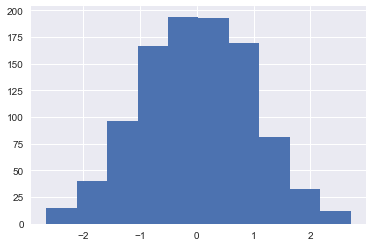

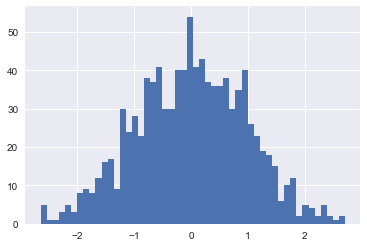

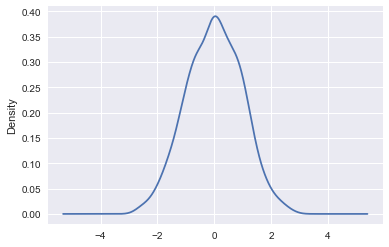

In [53]:
data = pd.Series(np.random.randn(1000))
plt.figure();plt.hist(data) #plt.figure() creates a new figure
plt.figure();plt.hist(data, bins=50)
# density plot
plt.figure();data.plot(kind = 'kde') #kde: kernel density estimate

In [ ]:
plt.savefig('foo.jpg')

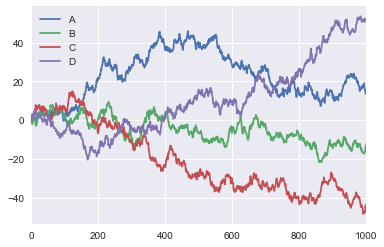

In [54]:
dfx= pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
#print(dfx)
#Compute the cummulative sum for each column
dfx = dfx.cumsum()

#plot all columns in the same plot
plt.figure(); dfx.plot();

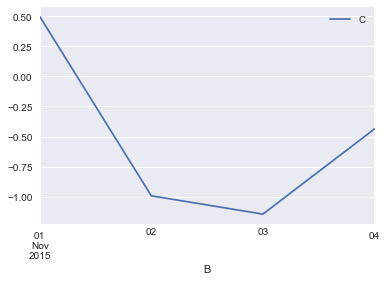

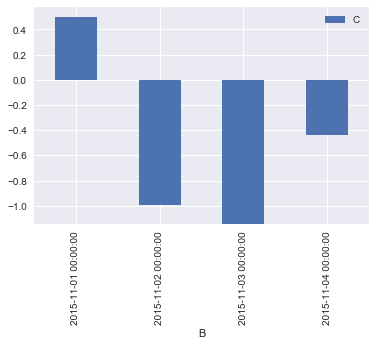

In [55]:
#plot column C against column B in df2
plt.figure(); df2.plot(x = 'B', y = 'C');
plt.figure(); df2.plot(kind = 'bar', x = 'B', y = 'C'); #bar plot

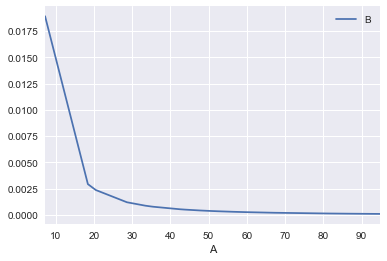

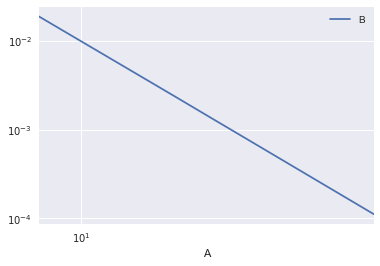

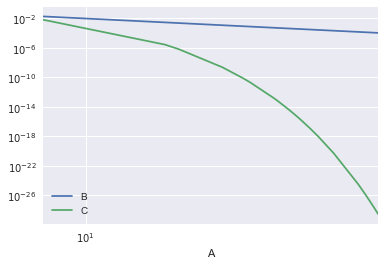

In [58]:
df = pd.read_csv('distributions_short.csv',
                 names=list('ABCD'))
dfs = df.sort_values(by='A', ascending = True)
#plot column B against A 
plt.figure(); dfs.plot(x = 'A', y = 'B');
#plot column B against A in log-log scale
plt.figure(); dfs.plot(x = 'A', y = 'B', loglog=True);
#plot columns B and C against A in loglog scale
plt.figure(); dfs.plot(x = 'A', y = ['B','C'], loglog=True);

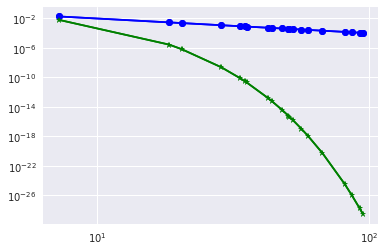

In [59]:
#Using matlab notation
plt.plot(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-')
plt.loglog(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-')

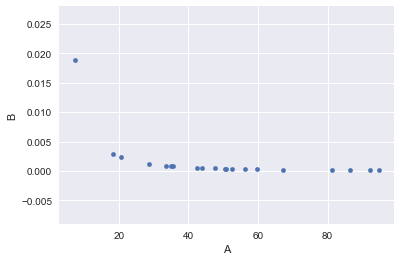

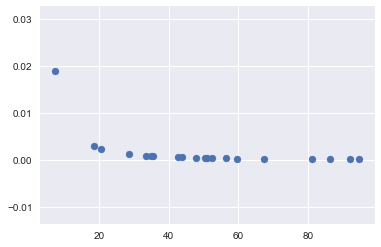

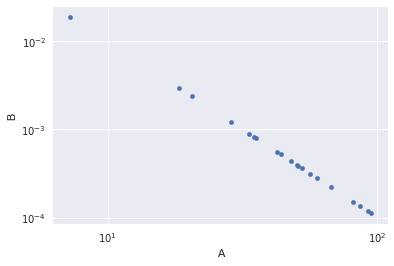

In [60]:
#scatter plot of columns A and B
plt.figure(); df.plot(kind ='scatter', x='A', y='B')
plt.figure(); plt.scatter(df.A, df.B)
#scatter plot of columns A and B in log-log scale
plt.figure(); df.plot(kind ='scatter', x='A', y='B', loglog = True)

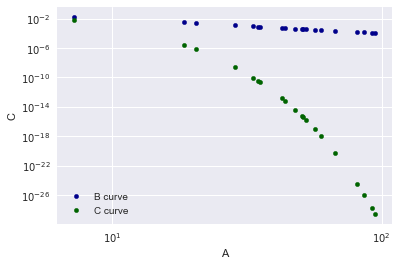

In [61]:
#putting many scatter plots into the same plot
t = df.plot(kind='scatter', x='A', y='B', color='DarkBlue', label='B curve', loglog=True);
df.plot(kind='scatter', x='A', y='C',color='DarkGreen', label='C curve', ax=t, loglog = True);

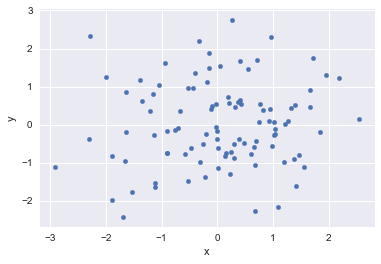

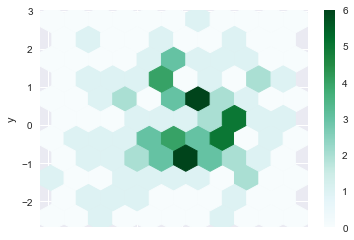

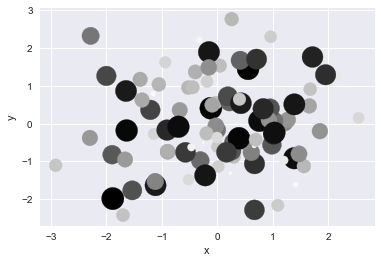

In [62]:
df6 = pd.DataFrame({'x':np.random.randn(100),
                   'y':np.random.randn(100),
                   'v': np.random.randint(1,500,100)})

plt.figure();df6.plot(kind = 'scatter', x='x',y='y')
plt.figure();df6.plot(kind='hexbin', x='x', y='y', gridsize=10)
plt.figure();df6.plot(kind = 'scatter', x='x',y='y', s=df6['v'],c=df6['v'])

In [63]:
stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
attr = 'Close'
dfstocks = web.get_data_yahoo(stocks, 
                               start=datetime(2014, 1, 1), 
                               end=datetime(2014, 12, 31))[attr]
dfstocks.head()

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-01-02,185.529999,37.160000,37.840000,150.100006,67.919998
2014-01-03,186.639999,36.910000,37.619999,149.559998,67.660004
2014-01-06,186.000000,36.130001,37.470001,147.000000,71.720001
2014-01-07,189.710007,36.410000,37.849998,149.360001,72.660004
2014-01-08,187.970001,35.759998,37.720001,151.279999,78.419998


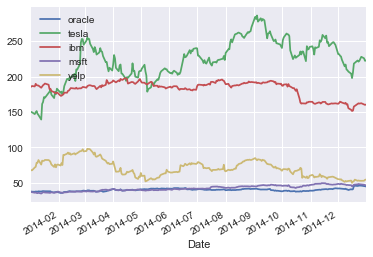

In [64]:
dfstocks.ORCL.plot(label = 'oracle')
dfstocks.TSLA.plot(label = 'tesla')
dfstocks.IBM.plot(label = 'ibm')
dfstocks.MSFT.plot(label = 'msft')
dfstocks.YELP.plot(label = 'yelp')
plt.legend(loc='best')

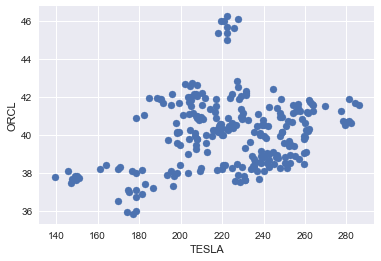

In [65]:
plt.scatter(dfstocks.TSLA, dfstocks.ORCL)
plt.xlabel('TESLA')
plt.ylabel('ORCL')

**Correlations of columns**

The correlation coefficient between variables $X$ and $Y$ is defined as follows: $$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$
In python we can compute the correlation coefficient of all pairs of columns with corr( )

In [66]:
corr = dfstocks.corr()
print(corr)

           IBM      MSFT      ORCL      TSLA      YELP
IBM   1.000000 -0.454119 -0.177628 -0.017239  0.458465
MSFT -0.454119  1.000000  0.492922  0.668519 -0.507538
ORCL -0.177628  0.492922  1.000000  0.251139 -0.469868
TSLA -0.017239  0.668519  0.251139  1.000000  0.137411
YELP  0.458465 -0.507538 -0.469868  0.137411  1.000000


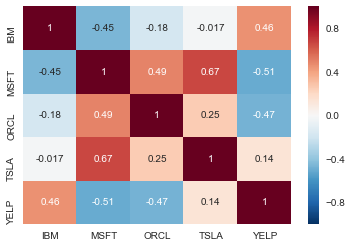

In [67]:
sns.heatmap(corr, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C5679E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF46D68>]], dtype=object)

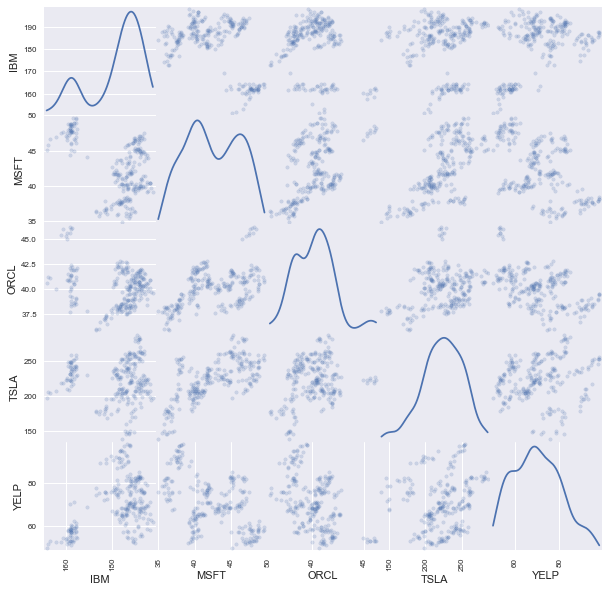

In [68]:
from pandas.tools.plotting import scatter_matrix
plt.figure(); scatter_matrix(dfstocks, alpha=0.2, figsize=(10, 10), diagonal='kde')

**Usefull additional information**

The pandas <a href = https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf>cheatsheet</a>

<a href = https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/02B-Pandas.ipynb> Tutorial</a> by Evimaria Terzi and Mark Corvella